In [2]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd

import gym
import load_policy
import tf_util

In [3]:
def describe_env(env):
    print('Observations:', env.observation_space.dtype, env.observation_space.shape)
    print('Actions:', env.action_space.dtype, env.action_space.shape)
    print('Action space high:', env.action_space.high)
    print('Action space low:', env.action_space.low)
    print('Time step limit:', env.spec.timestep_limit)
return

# 0. Test Mujoco environments

In [4]:
env_names = ['Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2', 'Reacher-v2', 'Walker2d-v2']

In [5]:
for env_name in env_names:
    env = gym.make(env_name)
    print(env_name)
    describe_env(env)

/Users/leah/Columbia/projects/deeprl_ucb/homework/hw1/hw1env/lib/python3.5/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ant-v2
Observations: float32 (111,)
Actions: float32 (8,)
Action space high: [1. 1. 1. 1. 1. 1. 1. 1.]
Action space low: [-1. -1. -1. -1. -1. -1. -1. -1.]
Time step limit: 1000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
HalfCheetah-v2
Observations: float32 (17,)
Actions: float32 (6,)
Action space high: [1. 1. 1. 1. 1. 1.]
Action space low: [-1. -1. -1. -1. -1. -1.]
Time step limit: 1000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Hopper-v2
Observations: float32 (11,)
Actions: float32 (3,)

# 1. run expert policy

In [17]:
# run demo.bash in terminal

In [18]:
expert_data = pickle.load(open(os.path.join('expert_data', 'Ant-v2' + '.pkl'), 'rb'))

In [20]:
expert_data.keys()

dict_keys(['actions', 'returns', 'observations'])

In [175]:
expert_data['actions'].shape

(20000, 1, 8)

# 2. run behavior cloning

The idea of behavior cloning is to do supervised learning using the expert data, where observations are the input and actions are labels.

In [72]:
# run sec2_BC in terminal

# 3. Criticising behavior cloning

In [78]:
os.listdir('results/BC')

['HalfCheetah-v2_10.csv',
 'Reacher-v2_10.csv',
 'Walker2d-v2_10.csv',
 'Hopper-v2_10.csv',
 'Humanoid-v2_10.csv',
 'Ant-v2_10.csv']

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

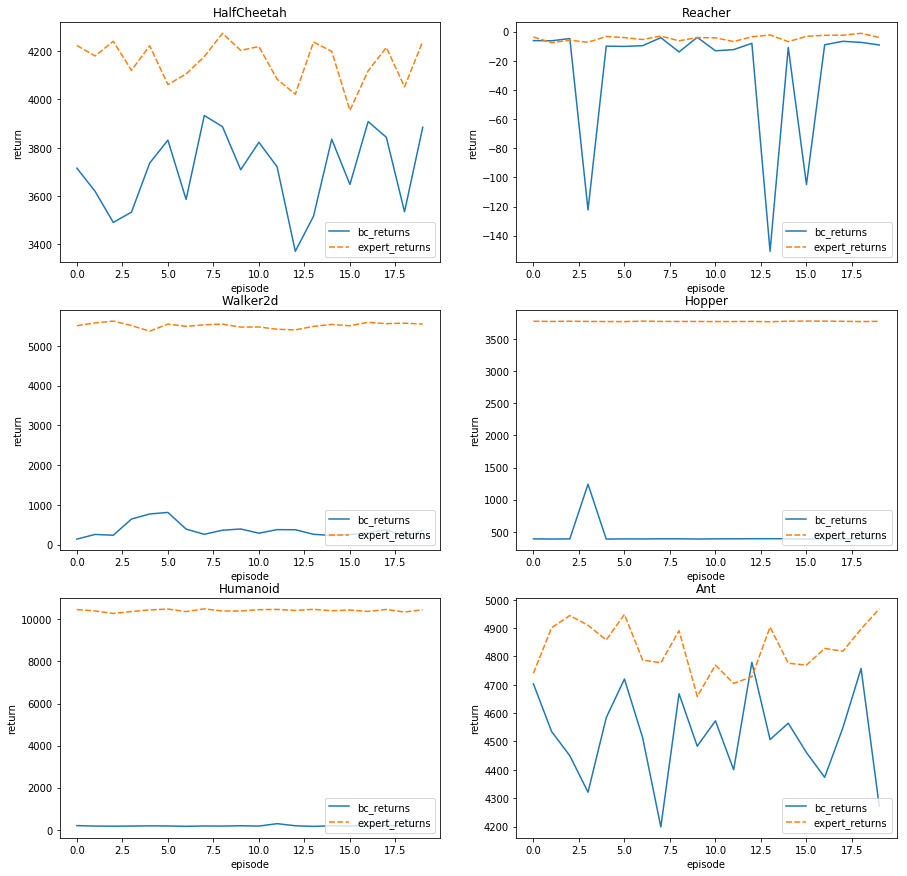

In [145]:
dfs = {}
fig, axs = plt.subplots(3,2, figsize=(15,15))
i = 0
for filename in os.listdir('results/BC'):
    envname = filename.split('-')[0]
    df = pd.read_csv(os.path.join('results/BC', filename), usecols=[1,2])
    dfs[envname] = df
    plt.figure
    row = int(i / 2)
    col = i % 2
    ax=sns.lineplot(data=df, ax=axs[row][col])
    ax.set_title(envname);
    ax.legend(loc='lower right')
    ax.set(xlabel='episode', ylabel='return')
    
    df['envname'] = envname
    i += 1

In [155]:
dfs_arr = list(dfs.values())
df_full = pd.concat(dfs_arr)
df_full = df_full.melt(id_vars='envname', value_vars=['expert_returns', 'bc_returns'],
                      var_name='policy', value_name='returns')

In [156]:
df_full.shape

(240, 3)

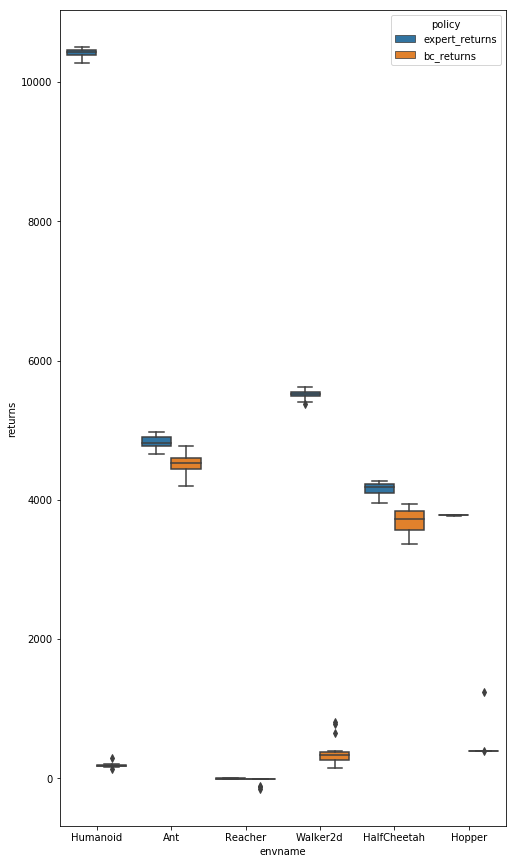

In [163]:
plt.figure(figsize=(8,15))
sns.boxplot(x='envname', y='returns', data=df_full, hue='policy');

# 4. Run DAgger

In [179]:
# run sec4_dagger in terminal

# 5. Criticising DAgger

In [180]:
os.listdir('results/DAgger')

['Reacher-v2_10_20.csv',
 'Humanoid-v2_10_20.csv',
 'Walker2d-v2_10_20.csv',
 'Hopper-v2_10_20.csv',
 'HalfCheetah-v2_10_20.csv',
 'Ant-v2_10_20.csv']

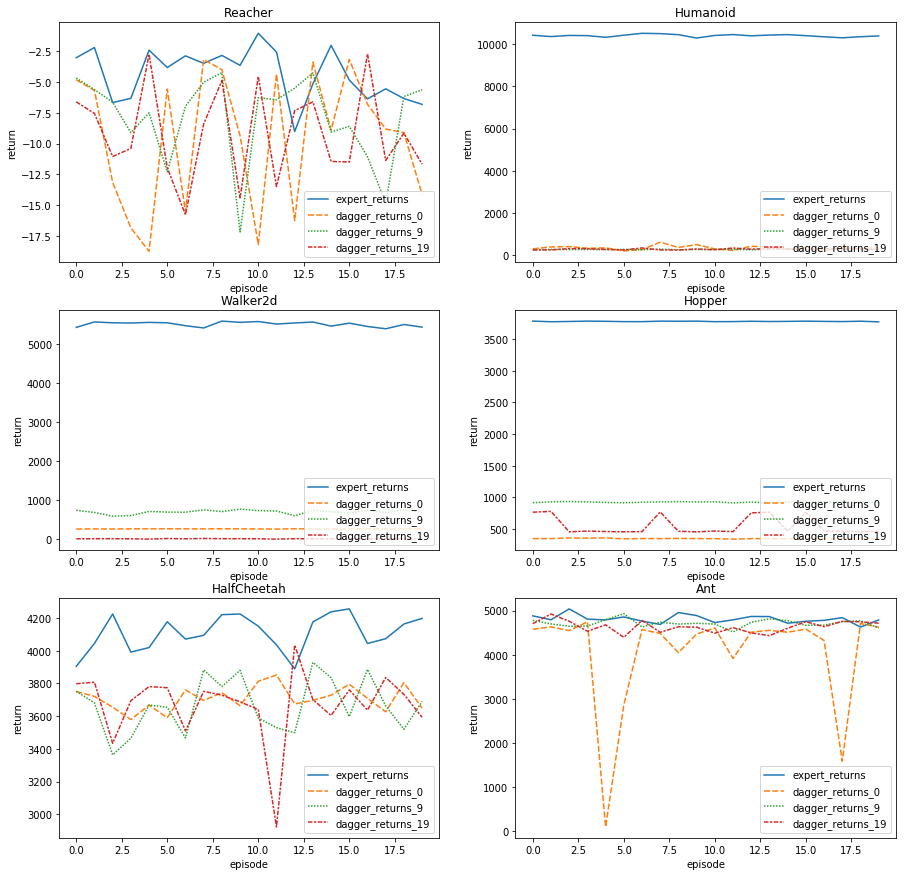

In [225]:
dfs_dagger = {}
fig, axs = plt.subplots(3,2, figsize=(15,15))
i = 0
for filename in os.listdir('results/DAgger'):
    envname = filename.split('-')[0]
    df = pd.read_csv(os.path.join('results/DAgger', filename), usecols=np.arange(1,22))
    dfs_dagger[envname] = df
    plt.figure
    row = int(i / 2)
    col = i % 2
    ax=sns.lineplot(
        data=df.loc[:,['expert_returns', 'dagger_returns_0', 'dagger_returns_9', 'dagger_returns_19']],
                       ax=axs[row][col])
    ax.set_title(envname);
    ax.legend(loc='lower right')
    ax.set(xlabel='episode', ylabel='return')
    i += 1

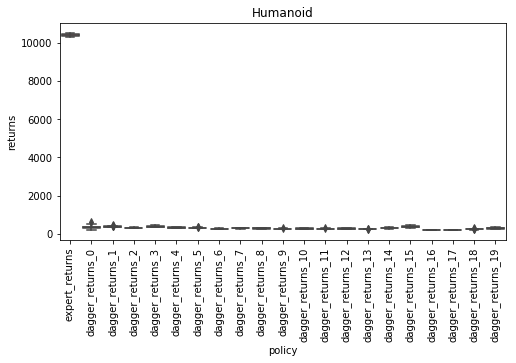

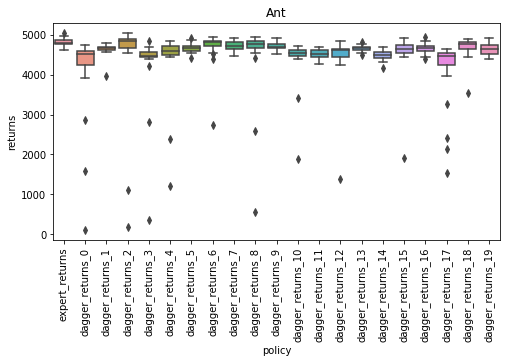

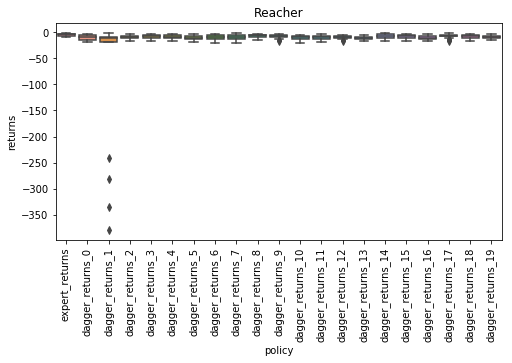

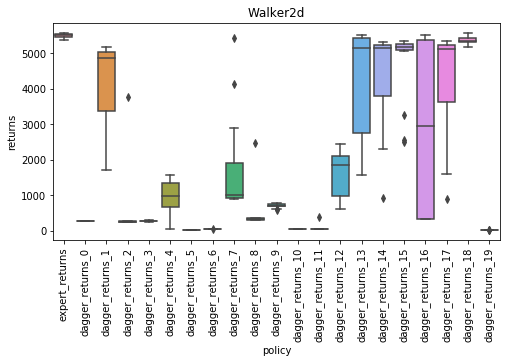

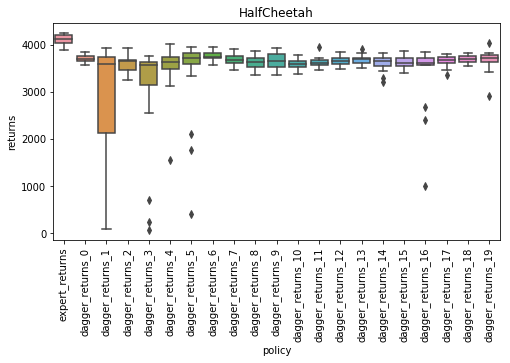

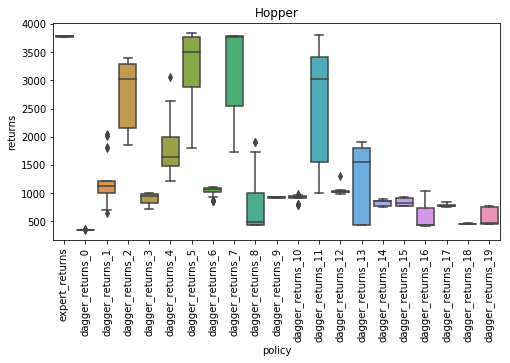

In [231]:
for envname, df in dfs_dagger.items():
    df_melt = df.melt(var_name='policy', value_name='returns')
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.boxplot(x='policy', y='returns', data=df_melt, ax=ax)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
    ax.set_title(envname)